In [1]:
import pandas as pd
import requests
import sqlite3
conn = sqlite3.connect('countries.db')
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#q1
df_country = pd.read_json("https://tyler.caraza-harter.com/cs301/fall18/data/countries.json")
print(df_country['population'].sum())

6279556636


In [3]:
#q2
capitals = requests.get('https://tyler.caraza-harter.com/cs301/fall18/data/capitals.txt')
capital_list = capitals.text.split('\n')
print(capital_list)

['https://tyler.caraza-harter.com/cs301/fall18/data/capitals/ElSalvador.json', 'https://tyler.caraza-harter.com/cs301/fall18/data/capitals/Bulgaria.json', 'https://tyler.caraza-harter.com/cs301/fall18/data/capitals/Guatemala.json', 'https://tyler.caraza-harter.com/cs301/fall18/data/capitals/Morocco.json', 'https://tyler.caraza-harter.com/cs301/fall18/data/capitals/Belgium.json', 'https://tyler.caraza-harter.com/cs301/fall18/data/capitals/Turkey.json', 'https://tyler.caraza-harter.com/cs301/fall18/data/capitals/NewZealand.json', 'https://tyler.caraza-harter.com/cs301/fall18/data/capitals/CaymanIslands.json', 'https://tyler.caraza-harter.com/cs301/fall18/data/capitals/Libya.json', 'https://tyler.caraza-harter.com/cs301/fall18/data/capitals/Tonga.json', 'https://tyler.caraza-harter.com/cs301/fall18/data/capitals/Cameroon.json', 'https://tyler.caraza-harter.com/cs301/fall18/data/capitals/Luxembourg.json', 'https://tyler.caraza-harter.com/cs301/fall18/data/capitals/Rwanda.json', 'https://ty

In [4]:
#q3
newlist = []
for url in capital_list:
    result = requests.get(url).json()
    cap = result['capital']
    cou = result['country']
    lat = result['latitude']
    lon = result['longitude']
    newlist.append([url,cap,cou,lat,lon])

df_capital = pd.DataFrame(newlist,columns=['url','capital', 'country','latitude','longitude'])
for index,row in df_capital.iterrows():
    if row['country'] == 'China':
        print(row['capital'])

Beijing


In [5]:
#q4
df_capital.sort_values(by=['latitude'])
print(df_capital.head())

                                                 url         capital  \
0  https://tyler.caraza-harter.com/cs301/fall18/d...    San Salvador   
1  https://tyler.caraza-harter.com/cs301/fall18/d...           Sofia   
2  https://tyler.caraza-harter.com/cs301/fall18/d...  Guatemala City   
3  https://tyler.caraza-harter.com/cs301/fall18/d...           Rabat   
4  https://tyler.caraza-harter.com/cs301/fall18/d...        Brussels   

       country   latitude  longitude  
0  El Salvador  13.700000 -89.200000  
1     Bulgaria  42.683333  23.316667  
2    Guatemala  14.616667 -90.516667  
3      Morocco  34.016667  -6.816667  
4      Belgium  50.833333   4.333333  


In [6]:
#q5
df_capital = df_capital.sort_values(by=['latitude'],ascending=False)
print(df_capital.head(3))

                                                   url    capital  country  \
166  https://tyler.caraza-harter.com/cs301/fall18/d...  Reykjavik  Iceland   
146  https://tyler.caraza-harter.com/cs301/fall18/d...   Helsinki  Finland   
46   https://tyler.caraza-harter.com/cs301/fall18/d...       Oslo   Norway   

      latitude  longitude  
166  64.150000 -21.950000  
146  60.166667  24.933333  
46   59.916667  10.750000  


In [7]:
#q6
print(df_capital.describe())

         latitude   longitude
count  175.000000  175.000000
mean    18.450381   15.739619
std     24.753747   66.408924
min    -41.300000 -175.200000
25%      4.383333  -14.641666
50%     17.250000   19.083333
75%     39.400000   47.108334
max     64.150000  178.416667


In [8]:
#q7
df_country['literacy'] = df_country['literacy'].str.replace(",",".").astype('float64')
df_country['phones'] = df_country['phones'].str.replace(",", ".").astype('float64')
print(df_country.describe())

               area  birth-rate   coastline  death-rate  gdp-per-capita  \
count  1.750000e+02  175.000000  175.000000  175.000000      175.000000   
mean   7.285332e+05   22.536114   10.833657    9.654971     9781.714286   
std    2.005565e+06   11.287090   38.245751    5.187216    10612.928974   
min    2.000000e+00    8.250000    0.000000    2.410000      500.000000   
25%    2.779000e+04   12.635000    0.090000    6.075000     1900.000000   
50%    1.431000e+05   20.340000    0.440000    8.230000     5100.000000   
75%    5.209850e+05   30.200000    3.150000   11.965000    14450.000000   
max    1.707520e+07   50.730000  331.660000   29.740000    55100.000000   

       infant-mortality    literacy  net-migration       phones    population  
count        175.000000  175.000000     175.000000   175.000000  1.750000e+02  
mean          38.052743   82.182286       0.123314   214.621143  3.588318e+07  
std           35.369320   20.086897       4.466356   218.613971  1.333418e+08  
min 

In [9]:
#q8
newdf = df_country[(df_country.continent=='Europe') & ( df_country.coastline == 0.0)].sort_values('area',ascending=False)
print(newdf.iat[0,5])

14.02


In [10]:
#q9
newdf = df_country[(df_country.continent == 'Africa') & (df_country.coastline == 0.0)].sort_values('area', ascending=False)
print(newdf.iat[0, 5])

16.38


In [11]:
#q10
newdf = df_country[(df_country.continent == 'South America') & (df_country.coastline == 0.0)].sort_values('area', ascending=False)
print(newdf.iat[0, 5])

7.53


In [12]:
def Haversine(lon1, lat1, lon2, lat2):
    from math import radians, cos, sin, asin, sqrt
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))
    r = 3956
    return c * r

In [13]:
#q11
print(Haversine(-89.411893,43.070231,-89.384113,43.074645,))

1.433899492072933


In [14]:
#q12
lon1 = df_capital.set_index('country').loc['India'].longitude
lat1 = df_capital.set_index('country').loc['India'].latitude
lon2 = df_capital.set_index('country').loc['Brazil'].longitude
lat2 = df_capital.set_index('country').loc['Brazil'].latitude
print(Haversine(lon1,lat1,lon2,lat2))

8840.574141306946


In [15]:
#13
df_target = df_country[df_country.continent=='South America']
countries = []
for index,row in df_target.iterrows():
    countries.append(row['country'])


dist=[]



for i in range(len(countries)):

    country1 = countries[i]
    temp = []
    lon1 = df_capital.set_index('country').loc[country1].longitude
    lat1 = df_capital.set_index('country').loc[country1].latitude
    for j in range(len(countries)):
        country2 = countries[j]
        lon2 = df_capital.set_index('country').loc[country2].longitude
        lat2 = df_capital.set_index('country').loc[country2].latitude
        if i==j:
            temp.append(None)
        else:
            temp.append(Haversine(lon1,lat1,lon2,lat2))
    dist.append(temp)

df_dist =pd.DataFrame(dist,index = countries,columns=countries)
print(df_dist)

                 Chile       Guyana     Colombia     Suriname       Brazil  \
Chile              NaN  2897.553095  2636.644599  2895.810776  1869.737031   
Guyana     2897.553095          NaN  1105.066312   215.336336  1709.071018   
Colombia   2636.644599  1105.066312          NaN  1303.405134  2275.516286   
Suriname   2895.810776   215.336336  1303.405134          NaN  1572.674233   
Brazil     1869.737031  1709.071018  2275.516286  1572.674233          NaN   
Bolivia    1180.741903  1747.772670  1512.119255  1778.772975  1342.297074   
Venezuela  3043.657689   646.969843   639.361118   861.456786  2228.690680   
Argentina   690.784168  2857.520462  2885.355610  2799.886429  1459.139733   
Peru       1531.480189  1837.860149  1167.505359  1944.750017  1967.770515   
Ecuador    2350.207788  1483.193753   451.004119  1661.699022  2344.584922   
Uruguay     833.403262  2878.638295  2962.230943  2809.744412  1412.096335   
Paraguay    963.635535  2214.288286  2337.615967  2153.855447   

In [16]:
#14
print(df_dist.mean(0,skipna = True).sort_values().index[0])

Bolivia


In [17]:
#15
ss_idx = df_dist.idxmin(skipna = True)
ret = []
ss_val = df_dist.min(skipna = True)
for i in range(len(ss_idx.keys())):
    index = ss_idx[i]
    value = ss_val[i]
    ret.append([index,value])
df_nearest = pd.DataFrame(ret,columns=['nearest','distance'], index=ss_idx.keys())
print(df_nearest )

             nearest    distance
Chile      Argentina  690.784168
Guyana      Suriname  215.336336
Colombia     Ecuador  451.004119
Suriname      Guyana  215.336336
Brazil      Paraguay  908.185709
Bolivia         Peru  669.926372
Venezuela   Colombia  639.361118
Argentina    Uruguay  143.069943
Peru         Bolivia  669.926372
Ecuador     Colombia  451.004119
Uruguay    Argentina  143.069943
Paraguay   Argentina  646.036442


In [18]:
df_country.to_sql("countries_table", conn, if_exists="replace", index=False)

In [19]:
#16
result_df = pd.read_sql("select country from countries_table where continent='North America' and population <=100000", conn)
print(result_df)

          country
0         Bermuda
1        Anguilla
2         Grenada
3        Dominica
4           Aruba
5  Cayman Islands


In [20]:
#17
result_df = pd.read_sql("select country from countries_table where continent='Europe' order by population desc", conn)
print(result_df.head(3))

   country
0   Russia
1  Germany
2   Turkey


In [21]:
#18
df_pop = pd.read_sql("select continent, avg(population) as avg_pop from countries_table group by 1", conn)
print(df_pop.head())

         continent       avg_pop
0           Africa  1.718654e+07
1             Asia  9.841850e+07
2        Australia  2.680252e+06
3  Central America  4.351613e+07
4           Europe  1.931838e+07


In [22]:
#q19
df_num_country = pd.read_sql("select continent, count(*) as  num_countries from countries_table group by 1", conn)
print(df_num_country)

         continent  num_countries
0           Africa             48
1             Asia             38
2        Australia             12
3  Central America             11
4           Europe             41
5    North America             13
6    South America             12


In [23]:
#20
result_df = pd.read_sql('select continent,avg("death-rate") as avg_death_rate from countries_table group by 1 HAVING avg_death_rate >10', conn)
print(result_df)

  continent  avg_death_rate
0    Africa       14.504792
1    Europe       10.258537


Text(0,0.5,'avg population per country(millions)')

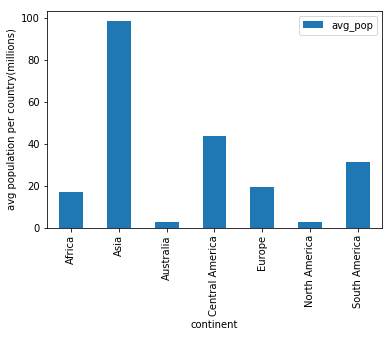

In [24]:
df_pop.set_index(["continent"], inplace=True)
df_pop['avg_pop'] = df_pop['avg_pop'].map(lambda x: x /1000000)
df_pop.plot(kind='bar')
plt.ylabel("avg population per country(millions)")

Text(0,0.5,'number of countries')

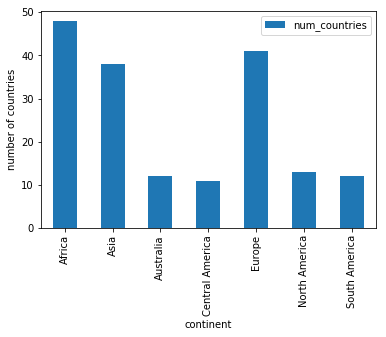

In [25]:
#22
df_num_country.set_index(["continent"], inplace=True)
df_num_country.plot(kind='bar')
plt.ylabel("number of countries")

Text(0,0.5,'dustance to nearest neighbour (miles)')

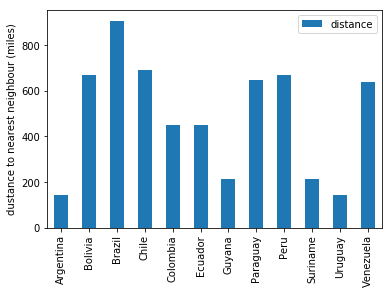

In [26]:
#23
del df_nearest['nearest']
newdf = df_nearest.sort_index()

#df.set_index(["continent"], inplace=True)
newdf.plot(kind='bar')
plt.ylabel('dustance to nearest neighbour (miles)')

Text(0,0.5,'population (millions)')

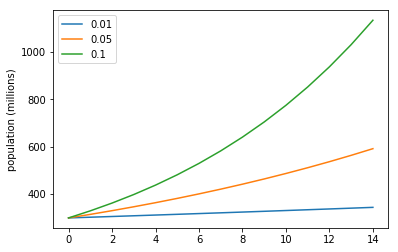

In [27]:
#24
usa_df = df_country[df_country.country=='United States']
pop_now = usa_df['population'].tolist()[0]
furture_list = []
for i in range(15):
    temp = [pop_now*((1+0.01)**i)/1000000, pop_now * ((1 + 0.05) ** i)/1000000, pop_now * ((1 + 0.1) ** i)/1000000]
    furture_list.append(temp)

newdf = pd.DataFrame(furture_list,index=range(15),columns=[0.01,0.05,0.1])

newdf.plot(kind='line')
plt.ylabel('population (millions)')

In [28]:
#25
print(df_country.corr())

                      area  birth-rate  coastline  death-rate  gdp-per-capita  \
area              1.000000   -0.108139  -0.098288   -0.002130        0.082266   
birth-rate       -0.108139    1.000000  -0.122044    0.400378       -0.639507   
coastline        -0.098288   -0.122044   1.000000   -0.120772        0.148445   
death-rate       -0.002130    0.400378  -0.120772    1.000000       -0.209958   
gdp-per-capita    0.082266   -0.639507   0.148445   -0.209958        1.000000   
infant-mortality -0.063257    0.868727  -0.156597    0.627801       -0.628262   
literacy          0.066041   -0.792272   0.136546   -0.343025        0.517995   
net-migration     0.065235   -0.086181   0.109484    0.044947        0.451700   
phones            0.109631   -0.731924   0.289311   -0.253893        0.879161   
population        0.462874   -0.063382  -0.070195   -0.054619       -0.041405   

                  infant-mortality  literacy  net-migration    phones  \
area                     -0.063257 

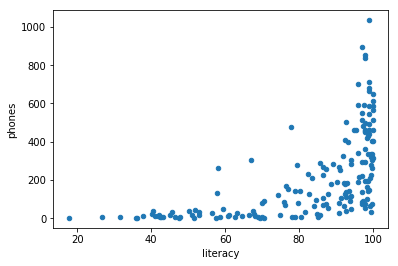

In [29]:
#q26
df_country.plot.scatter(x='literacy',y='phones')

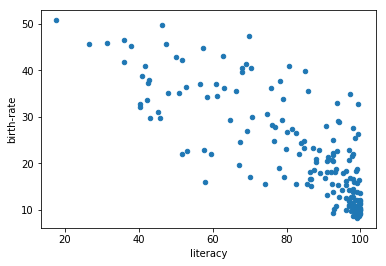

In [30]:
#q27
df_country.plot.scatter(x='literacy', y='birth-rate')

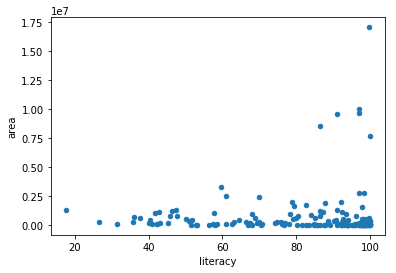

In [31]:
#q28
df_country.plot.scatter(x='literacy', y='area')

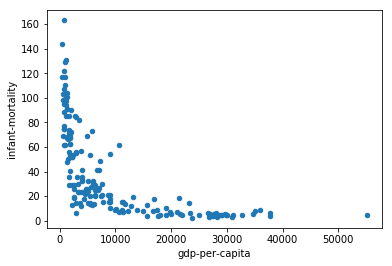

In [32]:
#q29
df_country.plot.scatter(x='gdp-per-capita', y='infant-mortality')

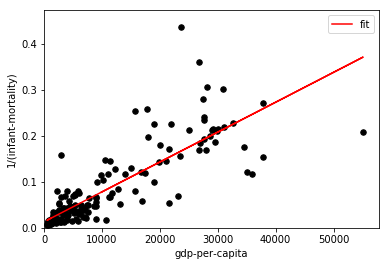

In [33]:
df_country['1/(infant-mortality)'] = df_country['infant-mortality'].map(lambda x: 1/x)
df_country["1"] = 1
res = np.linalg.lstsq(df_country[["gdp-per-capita", "1"]], df_country["1/(infant-mortality)"], rcond=None)

# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0]  # coefficients is (m,n)
m = coefficients[0]  # slope
n = coefficients[1]  # intercept
ax = df_country.plot.scatter(x='gdp-per-capita', y='1/(infant-mortality)', c='black', s=30, xlim=0, ylim=0)

df_country["fit"] = df_country["gdp-per-capita"] * m + n
df_country.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)